# `str` & Simulation
이번 챕터에서는 R에서 데이터를 어떻게 시뮬레이션을 운영하는지를 배울 것이다.

R은 여러 시뮬레이션 연구를 위해 많이 쓰이기 때문이다. 또한, 프로파일러를 배울 것인데, 이는 백그라운드에서 R 함수가 어떻게 동작하고 있고, 문제점들을 발견할 수 있게 해준다.

프로파일러는 프로그램을 최적화하는 데 매우 중요한 툴이다.

마지막으로, `str` 함수를 배울 것이다. 이는 정말로 매우 중요한 함수이다.

## 1. `str` 함수

`str`은 R 오브젝트의 내부 구조(Structure)를 보여준다.

- 분석을 해주는 함수이고, `summary`의 대체로 쓸 수 있다.
- 특히 중첩된 오브젝트들을 간결하게 보여준다

In [2]:
str(str)

function (object, ...)  


In [3]:
str(lm)

function (formula, data, subset, weights, na.action, method = "qr", model = TRUE, 
    x = FALSE, y = FALSE, qr = TRUE, singular.ok = TRUE, contrasts = NULL, 
    offset, ...)  


In [7]:
x <- rnorm(100, 2, 4)
summary(x)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-8.5849 -0.7925  1.7658  1.9353  4.7610 13.7130 

In [9]:
# x는 numeric vector이고, 100개의 원소라는 걸 알려준다
str(x)

 num [1:100] 1.38 3.5 1.99 -3.01 1.21 ...


In [11]:
f <- gl(40, 10)
str(f)

 Factor w/ 40 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...


In [12]:
summary(f)

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 
27 28 29 30 31 32 33 34 35 36 37 38 39 40 
10 10 10 10 10 10 10 10 10 10 10 10 10 10

In [13]:
# 또한 데이터셋에도 사용할 수 있다
library(datasets)
str(airquality)

'data.frame':	153 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...


In [14]:
m <- matrix(rnorm(100), 10, 10)
str(m)

 num [1:10, 1:10] 0.757 0.849 0.616 -1.393 0.434 ...


In [16]:
s <- split(airquality, airquality$Month)
str(s)
    # 'List' of 5 !

List of 5
 $ 5:'data.frame':	31 obs. of  6 variables:
  ..$ Ozone  : int [1:31] 41 36 12 18 NA 28 23 19 8 NA ...
  ..$ Solar.R: int [1:31] 190 118 149 313 NA NA 299 99 19 194 ...
  ..$ Wind   : num [1:31] 7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
  ..$ Temp   : int [1:31] 67 72 74 62 56 66 65 59 61 69 ...
  ..$ Month  : int [1:31] 5 5 5 5 5 5 5 5 5 5 ...
  ..$ Day    : int [1:31] 1 2 3 4 5 6 7 8 9 10 ...
 $ 6:'data.frame':	30 obs. of  6 variables:
  ..$ Ozone  : int [1:30] NA NA NA NA NA NA 29 NA 71 39 ...
  ..$ Solar.R: int [1:30] 286 287 242 186 220 264 127 273 291 323 ...
  ..$ Wind   : num [1:30] 8.6 9.7 16.1 9.2 8.6 14.3 9.7 6.9 13.8 11.5 ...
  ..$ Temp   : int [1:30] 78 74 67 84 85 79 82 87 90 87 ...
  ..$ Month  : int [1:30] 6 6 6 6 6 6 6 6 6 6 ...
  ..$ Day    : int [1:30] 1 2 3 4 5 6 7 8 9 10 ...
 $ 7:'data.frame':	31 obs. of  6 variables:
  ..$ Ozone  : int [1:31] 135 49 32 NA 64 40 77 97 97 85 ...
  ..$ Solar.R: int [1:31] 269 248 236 101 175 314 276 267 272 175 ...
  

## 2. Simulation

R에서 확률 분포에 관한 함수는 다음이 있다.

- `rnorm` : random Normal variates
- `dnorm` : Normal probability density
- `pnorm` : cum distribution for Normal dist
- `rpois` : generate random Poisson variates

사실 접두사가 어떤 성질인지를 알려준다.

- `d` : for density
- `r` : for random number generation
- `p` : for cumulative distribution
- `q` : for quantile function

그리고 이 접두사와 함께 쓰이는 확률 분포는 다음과 같다.

- `norm`
- `gamma`
- `beta`
- `pois`
- `binom`

In [17]:
x <- rnorm(10)
x

[1] -1.27209878 -0.36744107 -0.40495551  1.53553556  0.62846162  0.04708479
 [7] -0.09960481  0.65037489  1.17761047 -0.19930579

In [19]:
x <- rnorm(10, 20, 2)
x

[1] 23.35268 20.83737 21.89160 20.43378 21.28792 19.35708 21.21678 22.91837
 [9] 17.82102 23.23205

In [20]:
summary(x)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.82   20.53   21.25   21.23   22.66   23.35 

랜덤 넘버를 만들 때, 중요한 것은 `set.seed`를 통해 시드를 주어야 한다는 점이다.

같은 시드를 준다면 어떤 컴퓨터에서 하든 같은 결과물을 만들어 낼 수 있다.

즉, 시드가 동일하다면 랜덤은 랜덤이 아니게 된다.

In [21]:
set.seed(1)
rnorm(5)

[1] -0.6264538  0.1836433 -0.8356286  1.5952808  0.3295078

In [25]:
# set.seed는 1회 적용되므로 여기서는 다시 랜덤
rnorm(5)

[1] -0.8204684  0.4874291  0.7383247  0.5757814 -0.3053884

In [24]:
# 다시 돌아왔다
set.seed(1)
rnorm(5)

[1] -0.6264538  0.1836433 -0.8356286  1.5952808  0.3295078

In [27]:
# generate 10 poisson variable with lambda = 20
rpois(10, 20)

[1] 23 20 11 22 24 16 17 18 17 21

## 3. Random Number from a Linear Model
만약 확률분포가 아니라, 어떤 모형(예를 들어 선형 모형)으로부터 시뮬레이션을 하고 싶을 때는 어떻게 할까?

아래와 같은 식이 있다고 가정하자.
$$ y = \beta_0 + \beta_1x + \epsilon $$
where, 
$$  \epsilon \sim N(0, 2^2), x \sim N(0, 1^2), \beta_0 = 0.5, \beta_1 = 2$$

In [29]:
# 그냥 다 더해주면 된다!
set.seed(20)
x <- rnorm(100)
e <- rnorm(100, 0, 2)
y <- 0.5 + 2 * x + e
summary(y)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-6.4084 -1.5402  0.6789  0.6893  2.9303  6.5052 

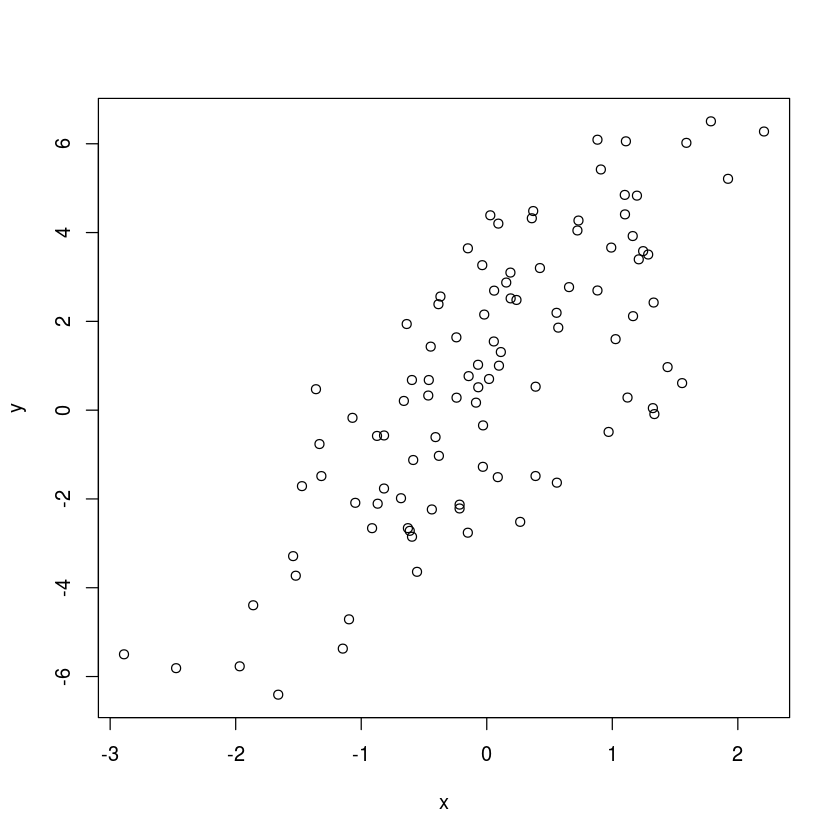

In [30]:
plot(x, y)

In [31]:
# what if x is binary?
x <- rbinom(100, 1, 0.5)
y <- 0.5 + 2 * x + e
summary(y)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.0489  0.1981  1.6548  1.6395  3.1800  6.3324 

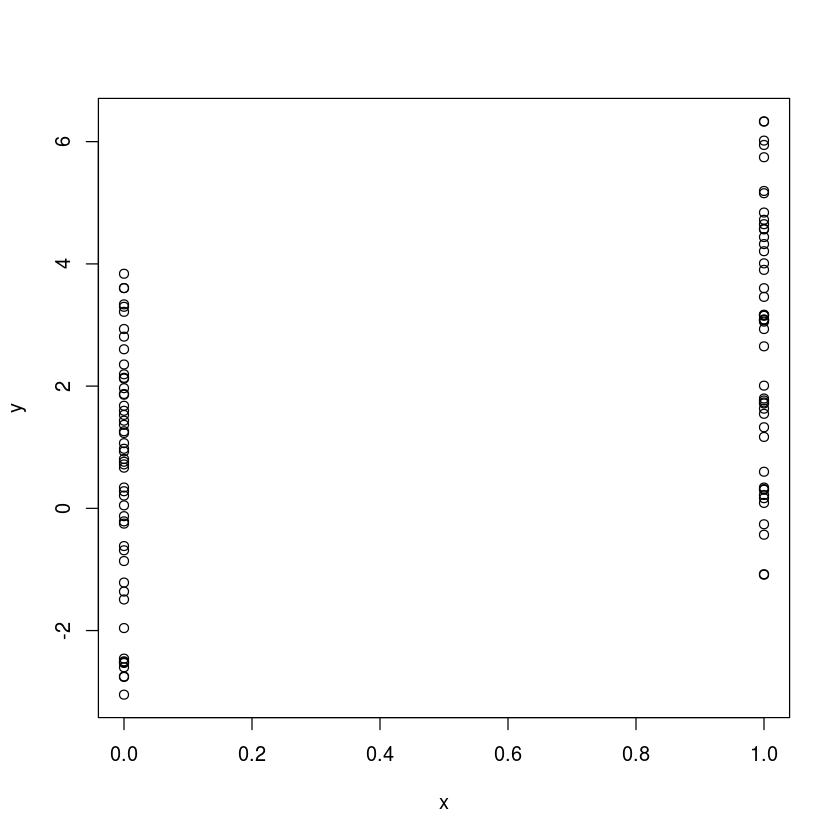

In [32]:
plot(x, y)

이번에는 모수가 선형으로 정의된 푸아송 분포를 시뮬레이트 한다고 가정하자.
$$ Y \sim Poisson(\mu) $$
$$ log\mu = \beta_0 + \beta_1x$$
$$ \beta_0 = 0.5, \beta_1 = 0.3 $$


In [33]:
set.seed(1)
x <- rnorm(100)
log.mu <- 0.5 + 0.3* x
y <- rpois(100, exp(log.mu))
summary(y)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    1.00    1.00    1.55    2.00    6.00 

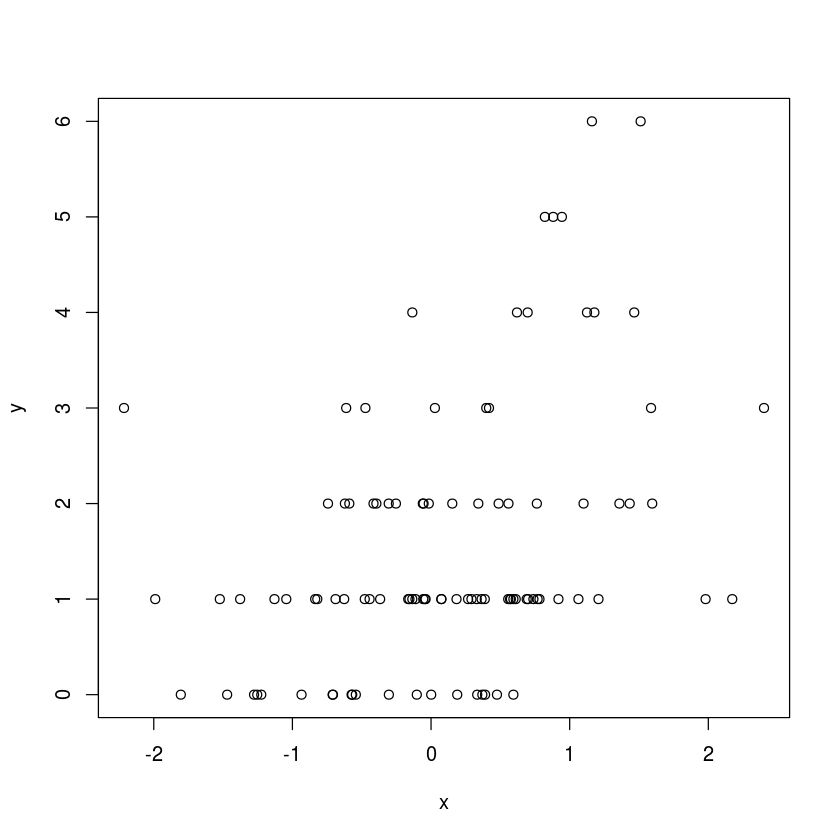

In [34]:
plot(x, y)

## 4. Random Sampling

`sample` 함수는 오브젝트의 집합으로부터 임의로 뽑을 수 있게 해준다.

In [36]:
str(sample)

function (x, size, replace = FALSE, prob = NULL)  


In [37]:
set.seed(1)
sample(1:10, 4)

[1] 3 4 5 7

In [38]:
sample(letters, 5)

[1] "f" "w" "y" "p" "n"

In [42]:
# with replacement (중복 허용하여))
sample(1:10, replace = TRUE)

[1]  8 10  3  7  2  3  4  1  4  9